# Importação de dependências, variáveis e funções

In [ ]:
import warnings
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# Ignora os warnings
warnings.filterwarnings("ignore")

# Constantes para classificação do gênero
male = 0
female = 1

# Constantes para classificação da saida Y
underweight = 0
normal_weight = 1
overweight = 2
obese = 3

# Semente fixa para gerar os mesmos resultados
seed = 1

# Tamanho do conjunto de teste
test_set_size = 0.20

# Métrica usada
scoring_metric = 'accuracy'
num_partitions = 10

# Lista de modelos
models = []

# Lista de resultados dos modelos
models_results = []
names = []

# Pipelines
pipelines = []

In [ ]:
# Função para padronizar a mensagem
def msg_format_results(name, mean, std):
  print("%s:" % (name))
  print("Acurácia (%.4f) / Desvio Padrão: (%.4f) \n" % (mean, std))

# Carga do Dataset

In [ ]:
# Url com todos os dados
url = "https://raw.githubusercontent.com/heldersantosc/obesity-classification-dataset/main/obesity-classification.csv"

# Lê o csv usando pandas
dataset = pd.read_csv(url, delimiter=',')

# Exibe as primeiras 5 linhas
dataset.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


# Tratamento de Dados

In [ ]:
# Substituindo os valores na coluna gênero por valores numéricos
dataset['Gender'] = dataset['Gender'].replace({'Male': male, 'Female': female})

# Substituindo os valores na coluna label por valores numéricos
dataset['Label'] = dataset['Label'].replace({'Underweight': underweight, 'Normal Weight': normal_weight, 'Overweight': overweight, 'Obese': obese})

# Exibe as primeiras 5 linhas
print(dataset.head())

   ID  Age  Gender  Height  Weight   BMI  Label
0   1   25       0     175      80  25.3      1
1   2   30       1     160      60  22.5      1
2   3   35       0     180      90  27.3      2
3   4   40       1     150      50  20.0      0
4   5   45       0     190     100  31.2      3


# Separação do Conjunto de Treino e Conjunto de Teste - Holdout

In [ ]:
# Separa somentes os valores
dataset_values = dataset.values

# Separação em X e Y (X - valores de entrada, Y - saida do modelo)
X = dataset_values[:,1:6]
y = dataset_values[:,6]

# Divisão do conjunto de dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_set_size, shuffle=True, random_state=seed, stratify=y)

# Validação cruzada com estratificação
kfold = StratifiedKFold(n_splits=num_partitions, shuffle=True, random_state=seed)


# Modelagem e Inferência

KNN:
Acurácia (0.8028) / Desvio Padrão: (0.1673) 

CART:
Acurácia (0.9778) / Desvio Padrão: (0.0444) 

NB:
Acurácia (0.8569) / Desvio Padrão: (0.1047) 

SVM:
Acurácia (0.7625) / Desvio Padrão: (0.1496) 



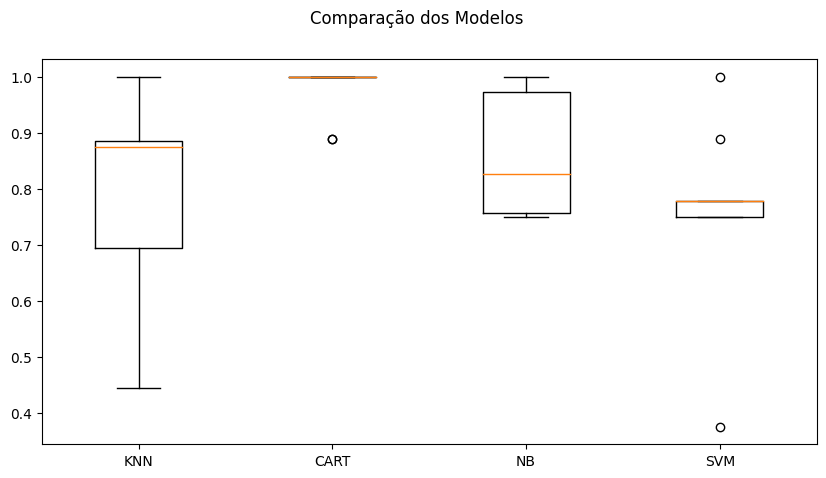

In [ ]:
# Limpa as listas
models_results.clear()
models.clear()
names.clear()

# Instanciando os modelos e adicionando na lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliação cruzada de cada modelo
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_metric)
    models_results.append(cv_results)
    names.append(name)
    msg_format_results(name, cv_results.mean(), cv_results.std())

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(10,5))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(models_results)
ax.set_xticklabels(names)
plt.show()


# Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig:
Acurácia (0.8028) / Desvio Padrão: (0.1673) 

CART-orig:
Acurácia (0.9778) / Desvio Padrão: (0.0444) 

NB-orig:
Acurácia (0.8569) / Desvio Padrão: (0.1047) 

SVM-orig:
Acurácia (0.7625) / Desvio Padrão: (0.1496) 

KNN-padr:
Acurácia (0.8042) / Desvio Padrão: (0.1821) 

CART-padr:
Acurácia (0.9889) / Desvio Padrão: (0.0333) 

NB-padr:
Acurácia (0.8333) / Desvio Padrão: (0.1127) 

SVM-padr:
Acurácia (0.8472) / Desvio Padrão: (0.1443) 

KNN-norm:
Acurácia (0.7931) / Desvio Padrão: (0.2056) 

CART-norm:
Acurácia (0.9778) / Desvio Padrão: (0.0444) 

NB-norm:
Acurácia (0.8333) / Desvio Padrão: (0.1127) 

SVM-norm:
Acurácia (0.8097) / Desvio Padrão: (0.1375) 



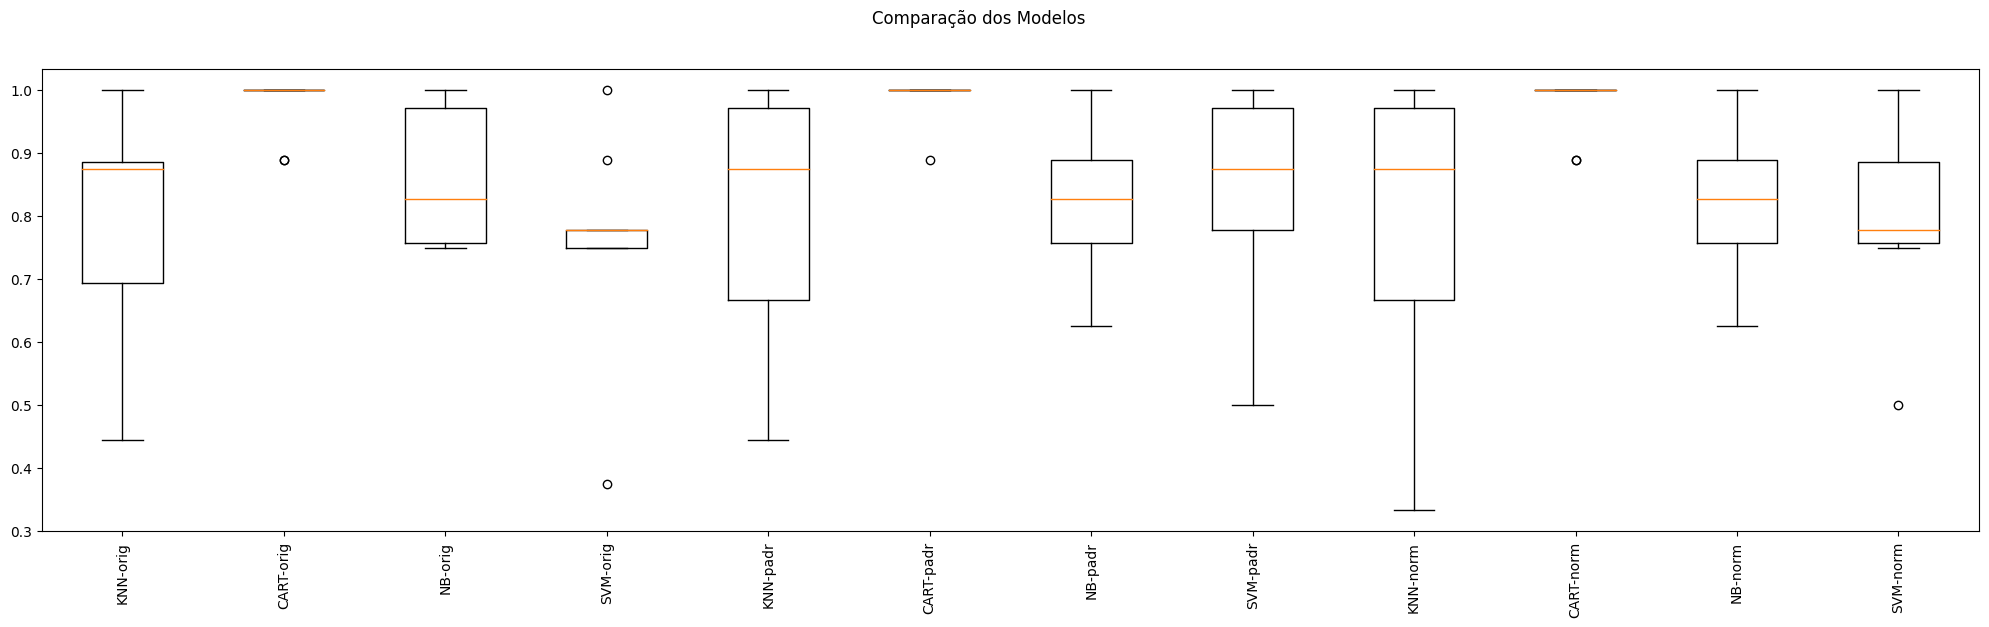

In [ ]:
# Define o seed para esse bloco de código
np.random.seed(seed)

# Limpa as listas
models_results.clear()
pipelines.clear()
names.clear()


# Modelos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Scalers para normalizar e padronizar os dados
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold,
                                 scoring=scoring_metric)
    models_results.append(cv_results)
    names.append(name)
    msg_format_results(name, cv_results.mean(), cv_results.std())

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(models_results)
ax.set_xticklabels(names, rotation=90)
plt.show()


# Otimização dos hiperparâmetros

In [ ]:
# Define o seed para esse bloco de código
np.random.seed(seed)

# Limpa as listas
pipelines.clear()

# Variáveis como tuplas nomeadas
cart = ('cart', DecisionTreeClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Define diferentes pipelines com transformações de dados
pipelines.append(('cart-orig', Pipeline(steps=[cart])))
pipelines.append(('cart-padr', Pipeline(steps=[standard_scaler, cart])))
pipelines.append(('cart-norm', Pipeline(steps=[min_max_scaler, cart])))

# Define os hiperparâmetros a serem otimizados
param_grid = {
    'cart__max_depth': [3, 5, 7],
    'cart__min_samples_split': [2, 5, 10]
}

# Divide os conjuntos de dados X e y em conjuntos de treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_set_size, random_state=seed, stratify=y)

# Realiza uma busca de hiperparâmetros usando validação cruzada
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
    grid.fit(X_train, y_train)
    print("Modelo: %s - Melhor score: %f usando parametros %s" % (name, grid.best_score_, grid.best_params_))




Modelo: cart-orig - Melhor score: 0.988889 usando parametros {'cart__max_depth': 7, 'cart__min_samples_split': 2}
Modelo: cart-padr - Melhor score: 0.988889 usando parametros {'cart__max_depth': 7, 'cart__min_samples_split': 2}
Modelo: cart-norm - Melhor score: 0.988889 usando parametros {'cart__max_depth': 5, 'cart__min_samples_split': 5}


# Avaliação com conjunto de teste

In [ ]:
# Ajuste do scaler
scaler = StandardScaler().fit(X_train)

# Aplicação da padronização
rescaledX_train = scaler.transform(X_train)

# Definindo o modelo DecisionTreeClassifier com o melhor resultado acima
model = DecisionTreeClassifier(max_depth=7, min_samples_split=2)

# Treinando o modelo
model.fit(rescaledX_train, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledX_test = scaler.transform(X_test)
predictions = model.predict(rescaledX_test)
print(accuracy_score(y_test, predictions))

1.0


# Preparação com todo o dataset

In [ ]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
model.fit(rescaledX, y)

DecisionTreeClassifier(max_depth=7)

# Exportando modelo treinado e scaler


In [ ]:
# Exporta o model
pickle_out = open('classifier_model.pkl', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()

# Export o scaler
pickle_out = open('standard_scaler.pkl', 'wb')
pickle.dump(scaler, pickle_out)
pickle_out.close()